# 動作價值方法
估計動作最自然的方法，就是對實際收到的獎勵進行平均（樣本平均 Sample-average）。

<img src="https://github.com/Ratherman/Reinforcement-Learning/blob/main/formula_image/img_ch2_01.png?raw=true" alt="drawing" width="400"/>


# 貪婪動作
利用當前知識來最大化立即獎勵
<img src="https://github.com/Ratherman/Reinforcement-Learning/blob/main/formula_image/img_ch2_02.png?raw=true" alt="drawing" width="400"/>


# ɛ-貪婪方法
步驟數量增加至無限大，每個動作都會被採樣無限次，確保收斂發生。
<img src="https://github.com/Ratherman/Reinforcement-Learning/blob/main/formula_image/img_ch2_03.png?raw=true" alt="drawing" width="400"/>

# 10-搖臂拉霸機測試環境（k-armed bandit problem）

In [115]:
# Step 1: Decide 動作值 q*(a)
import numpy as np
import matplotlib.pyplot as plt

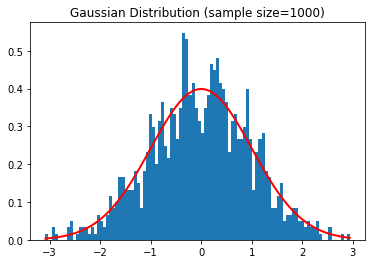

In [116]:
sample_size = 1000
sigma=1
mu=0
# loc: Mean ("centre") of the distribution
# scale: Standard deviation (Spread or "width") of the distribution. Must be non-negative.
gaussian_distribution = [np.random.normal(loc=mu, scale=sigma) for _ in range(sample_size)]

plt.title(f"Gaussian Distribution (sample size={sample_size})")
count, bins, ignored = plt.hist(gaussian_distribution, bins=100, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

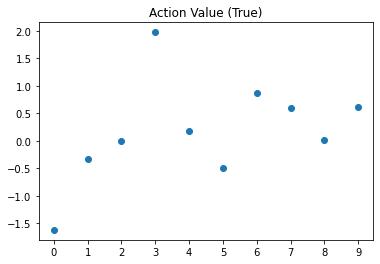

In [117]:
# Derive q*(a), a = a1, a2, a3, ..., a10
action_values_true = gaussian_distribution[:10]

plt.title("Action Value (True)")
plt.plot(action_values_true, "o")
plt.xticks(range(10))
plt.show()

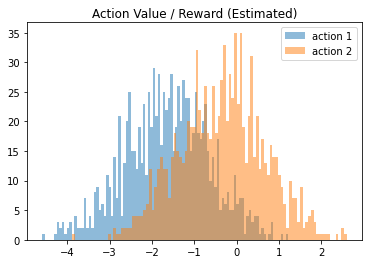

In [118]:
def derive_action_value(action_number):
    mu = action_values_true[action_number]
    sigma = 1
    return np.random.normal(loc=mu, scale=sigma)

# Action 1
action_1_distribution = [derive_action_value(0) for _ in range(sample_size)]

# Action 2
action_2_distribution = [derive_action_value(1) for _ in range(sample_size)]

plt.title("Action Value / Reward (Estimated)")
plt.hist(action_1_distribution, alpha=0.5, bins=100, label="action 1")
plt.hist(action_2_distribution, alpha=0.5, bins=100, label="action 2")
plt.legend()
plt.show()

我們可以測量此學習方法在 1000 個時步中逐步提昇的表現和行為。這構成了一個行程（Run）。將學習方法重複 2000 個獨立行程，且每個行程使用不同的拉霸機問題，我們將可以獲得學習演算法平均行為的評估。

學習方法
1. 貪婪方法（Greedy）
2. ɛ-貪婪方法（ɛ-Greedy, where ɛ=0.01）
3. ɛ-貪婪方法（ɛ-Greedy, where ɛ=0.1）

In [136]:
# =============== #
# 貪婪方法（Greedy）#
# =============== #

# 探索 100 次（Exploration）：先對每個 action 隨機抽取 10 次（共100次），平均後取得對該動作的估計值
# 後續 900 次就直接 exploit 當前知識
# 當然，每次 exploit 都會再次調整當前知識

# initialize prior knowledge, include
# 1) prior knowledge count: use for recording how many times we've sample a certain action.
# 2) prior knowledge action: use for recording all the estimated rewards in the history
# 3) prior knowledge reward: use for record current estimation of a certain action

# 用探索的吧

prior_knowledge_count = {
    "_1": 10,
    "_2": 10,
    "_3": 10,
    "_4": 10,
    "_5": 10,
    "_6": 10,
    "_7": 10,
    "_8": 10,
    "_9": 10,
    "_10":10
}

prior_knowledge_action = {
    "_1":[derive_action_value(0) for _ in range(prior_knowledge_count["_1"])],
    "_2":[derive_action_value(1) for _ in range(prior_knowledge_count["_2"])],
    "_3":[derive_action_value(2) for _ in range(prior_knowledge_count["_3"])],
    "_4":[derive_action_value(3) for _ in range(prior_knowledge_count["_4"])],
    "_5":[derive_action_value(4) for _ in range(prior_knowledge_count["_5"])],
    "_6":[derive_action_value(5) for _ in range(prior_knowledge_count["_6"])],
    "_7":[derive_action_value(6) for _ in range(prior_knowledge_count["_7"])],
    "_8":[derive_action_value(7) for _ in range(prior_knowledge_count["_8"])],
    "_9":[derive_action_value(8) for _ in range(prior_knowledge_count["_9"])],
    "_10":[derive_action_value(9) for _ in range(prior_knowledge_count["_10"])],
}

prior_knowledge_reward = {
    "_1": sum(prior_knowledge_action["_1"])/prior_knowledge_count["_1"],
    "_2": sum(prior_knowledge_action["_2"])/prior_knowledge_count["_2"],
    "_3": sum(prior_knowledge_action["_3"])/prior_knowledge_count["_3"],
    "_4": sum(prior_knowledge_action["_4"])/prior_knowledge_count["_4"],
    "_5": sum(prior_knowledge_action["_5"])/prior_knowledge_count["_5"],
    "_6": sum(prior_knowledge_action["_6"])/prior_knowledge_count["_6"],
    "_7": sum(prior_knowledge_action["_7"])/prior_knowledge_count["_7"],
    "_8": sum(prior_knowledge_action["_8"])/prior_knowledge_count["_8"],
    "_9": sum(prior_knowledge_action["_9"])/prior_knowledge_count["_9"],
    "_10": sum(prior_knowledge_action["_10"])/prior_knowledge_count["_10"]
}